In [43]:
# Imports
import seaborn as sns
import numpy as np
import os
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
from typing import *
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML

In [44]:
# Table preparation:
df = pd.read_table("../reports/mapping_stats.tsv")
columns = df.columns.to_list()
df = df.drop(labels=['Started job on', 'Started mapping on', 'Finished on', 
                     'Mapping speed, Million of reads per hour',
                     'Average input read length',
                     'Deletion rate per base', 'Insertion rate per base',
                     'Deletion average length', 'Insertion average length',
                     'Mismatch rate per base, %'], axis=1)
display(df)

,sample,sample_unit,read,Number of input reads,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,Number of splices: Total,Number of splices: Annotated (sjdb),Number of splices: GT/AG,...,Number of splices: Non-canonical,Number of reads mapped to multiple loci,% of reads mapped to multiple loci,Number of reads mapped to too many loci,% of reads mapped to too many loci,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads
0,cow-testis-neonat1,SRR7175531,R1,48857764,39854763,81.57,148.39,11175040,10561686,11049666,...,40255,7308614,14.96,20752,0.04,0.0,3.37,0.06,499903,1.02
1,cow-testis-neonat1,SRR7175531,R2,48857764,38125225,78.03,147.66,11656297,10973015,11528674,...,30064,7878972,16.13,18750,0.04,0.0,5.75,0.05,402728,0.82
2,cow-testis-neonat2,SRR7175526,R1,48330765,39099361,80.90,148.55,11315163,10751738,11196248,...,31888,7730995,16.00,14626,0.03,0.0,3.03,0.04,430184,0.89
3,cow-testis-neonat2,SRR7175526,R2,48330765,37367345,77.32,147.83,11924908,11276073,11794696,...,27461,8410108,17.40,13292,0.03,0.0,5.21,0.04,347540,0.72
4,cow-testis-neonat3,SRR7175527,R1,57816503,49445304,85.52,148.53,12647914,11978561,12495890,...,51933,6511989,11.26,30437,0.05,0.0,3.09,0.08,546774,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,cow-liver-K024,K024_S19_L002,R2,22287057,20082538,90.11,97.80,5534564,5401415,5487116,...,12955,1822651,8.18,6197,0.03,0.0,1.58,0.10,66501,0.30
84,cow-liver-K024,K024_S19_L006,R1,22214904,20183350,90.85,97.91,5285283,5175934,5240977,...,12839,1795444,8.08,6438,0.03,0.0,0.93,0.10,68241,0.31
85,cow-liver-K024,K024_S19_L006,R2,22214904,20024973,90.14,97.80,5523786,5390910,5476860,...,12788,1818301,8.19,6223,0.03,0.0,1.54,0.10,65514,0.29
86,cow-liver-K024,K024_S41_L004,R1,25385190,23072081,90.89,97.90,6031658,5906018,5980921,...,14878,2038178,8.03,7406,0.03,0.0,0.95,0.10,77965,0.31


In [40]:
# Merging the data on a per sample basis (merging technical replicates)
aggregation_functions = defaultdict()
for column in df.columns:
    if column == "sample":
        aggregation_functions[column] = 'first'
        continue
    if column == "read":
        aggregation_functions[column] = 'first'
        continue
    if "%" in column or 'Average' in column:
        aggregation_functions[column] = 'mean'
        continue
    if "number" in column.lower():
        aggregation_functions[column] = 'sum'
df_new = df.groupby(['sample','read']).aggregate(aggregation_functions)
display(df_new)

sample read  Number of input reads  \
sample             read                                                   
cow-liver-B004     R1        cow-liver-B004   R1               68088155   
                   R2        cow-liver-B004   R2               68088155   
cow-liver-B005     R1        cow-liver-B005   R1               59261965   
                   R2        cow-liver-B005   R2               59261965   
cow-liver-B008     R1        cow-liver-B008   R1               67721906   
                   R2        cow-liver-B008   R2               67721906   
cow-liver-B022     R1        cow-liver-B022   R1               65895110   
                   R2        cow-liver-B022   R2               65895110   
cow-liver-B027     R1        cow-liver-B027   R1               71417085   
                   R2        cow-liver-B027   R2               71417085   
cow-liver-B028     R1        cow-liver-B028   R1               74118427   
                   R2        cow-liver-B028   R2               74118427   
cow-liver-K001     R1        cow-liver-K001   R1               61179358   
                   R2        cow-liver-K001   R2               61179358   
cow-liver-K006     R1        cow-liver-K006   R1               61785728   
                   R2        cow-liver-K006   R2               61785728   
cow-liver-K011     R1        cow-liver-K011   R1               61734135   
                   R2        cow-liver-K011   R2               61734135   
cow-liver-K013     R1        cow-liver-K013   R1               72722710   
                   R2        cow-liver-K013   R2               72722710   
cow-liver-K018     R1        cow-liver-K018   R1               70188534   
                   R2        cow-liver-K018   R2               70188534   
cow-liver-K024     R1        cow-liver-K024   R1               69887151   
                   R2        cow-liver-K024   R2               69887151   
cow-testis-adult1  R1     cow-testis-adult1   R1               47433310   
                   R2     cow-testis-adult1   R2               47433310   
cow-testis-adult2  R1     cow-testis-adult2   R1               49677655   
                   R2     cow-testis-adult2   R2               49677655   
cow-testis-adult3  R1     cow-testis-adult3   R1               49338494   
                   R2     cow-testis-adult3   R2               49338494   
cow-testis-neonat1 R1    cow-testis-neonat1   R1               48857764   
                   R2    cow-testis-neonat1   R2               48857764   
cow-testis-neonat2 R1    cow-testis-neonat2   R1               48330765   
                   R2    cow-testis-neonat2   R2               48330765   
cow-testis-neonat3 R1    cow-testis-neonat3   R1               57816503   
                   R2    cow-testis-neonat3   R2               57816503   
pig-liver-old1     R1        pig-liver-old1   R1               39595686   
                   R2        pig-liver-old1   R2               39595686   
pig-liver-old2     R1        pig-liver-old2   R1               38500651   
                   R2        pig-liver-old2   R2               38500651   
pig-liver-young-1  R1     pig-liver-young-1   R1               32939263   
                   R2     pig-liver-young-1   R2               32939263   
pig-liver-young-2  R1     pig-liver-young-2   R1               32287173   
                   R2     pig-liver-young-2   R2               32287173   
pig-testis-31      R1         pig-testis-31   R1               73041056   
                   R2         pig-testis-31   R2               73041056   
pig-testis-5       R1          pig-testis-5   R1               89197627   
                   R2          pig-testis-5   R2               89197627   
pig-testis-54      R1         pig-testis-54   R1               86597430   
                   R2         pig-testis-54   R2               86597430   

                         Uniquely mapped reads number  \
sample             read                                 
cow-liver-B004     R1 

sample  sample_unit read  \
sample             read                                         
cow-liver-B004     R1        cow-liver-B004          NaN   R1   
                   R2        cow-liver-B004          NaN   R2   
cow-liver-B005     R1        cow-liver-B005          NaN   R1   
                   R2        cow-liver-B005          NaN   R2   
cow-liver-B008     R1        cow-liver-B008          NaN   R1   
                   R2        cow-liver-B008          NaN   R2   
cow-liver-B022     R1        cow-liver-B022          NaN   R1   
                   R2        cow-liver-B022          NaN   R2   
cow-liver-B027     R1        cow-liver-B027          NaN   R1   
                   R2        cow-liver-B027          NaN   R2   
cow-liver-B028     R1        cow-liver-B028          NaN   R1   
                   R2        cow-liver-B028          NaN   R2   
cow-liver-K001     R1        cow-liver-K001          NaN   R1   
                   R2        cow-liver-K001          NaN   R2   
cow-liver-K006     R1        cow-liver-K006          NaN   R1   
                   R2        cow-liver-K006          NaN   R2   
cow-liver-K011     R1        cow-liver-K011          NaN   R1   
                   R2        cow-liver-K011          NaN   R2   
cow-liver-K013     R1        cow-liver-K013          NaN   R1   
                   R2        cow-liver-K013          NaN   R2   
cow-liver-K018     R1        cow-liver-K018          NaN   R1   
                   R2        cow-liver-K018          NaN   R2   
cow-liver-K024     R1        cow-liver-K024          NaN   R1   
                   R2        cow-liver-K024          NaN   R2   
cow-testis-adult1  R1     cow-testis-adult1          NaN   R1   
                   R2     cow-testis-adult1          NaN   R2   
cow-testis-adult2  R1     cow-testis-adult2          NaN   R1   
                   R2     cow-testis-adult2          NaN   R2   
cow-testis-adult3  R1     cow-testis-adult3          NaN   R1   
                   R2     cow-testis-adult3          NaN   R2   
cow-testis-neonat1 R1    cow-testis-neonat1          NaN   R1   
                   R2    cow-testis-neonat1          NaN   R2   
cow-testis-neonat2 R1    cow-testis-neonat2          NaN   R1   
                   R2    cow-testis-neonat2          NaN   R2   
cow-testis-neonat3 R1    cow-testis-neonat3          NaN   R1   
                   R2    cow-testis-neonat3          NaN   R2   
pig-liver-old1     R1        pig-liver-old1          NaN   R1   
                   R2        pig-liver-old1          NaN   R2   
pig-liver-old2     R1        pig-liver-old2          NaN   R1   
                   R2        pig-liver-old2          NaN   R2   
pig-liver-young-1  R1     pig-liver-young-1          NaN   R1   
                   R2     pig-liver-young-1          NaN   R2   
pig-liver-young-2  R1     pig-liver-young-2          NaN   R1   
                   R2     pig-liver-young-2          NaN   R2   
pig-testis-31      R1         pig-testis-31          NaN   R1   
                   R2         pig-testis-31          NaN   R2   
pig-testis-5       R1          pig-testis-5          NaN   R1   
                   R2          pig-testis-5          NaN   R2   
pig-testis-54      R1         pig-testis-54          NaN   R1   
                   R2         pig-testis-54          NaN   R2   

                                   sample-read  Uniquely mapped reads number  \
sample             read                                                        
cow-liver-B004     R1        cow-liver-B004-R1                      62716875   
                   R2        cow-liver-B004-R2                      62224258   
cow-liver-B005     R1        cow-liver-B005-R1                      54402399   
                   R2        cow-liver-B005-R2                      53863244   
cow-liver-B008     R1        cow-liver-B008-R1                      62567917   
                   R2        cow-liver-B008-R2                      61851992   
cow-liver-B022  

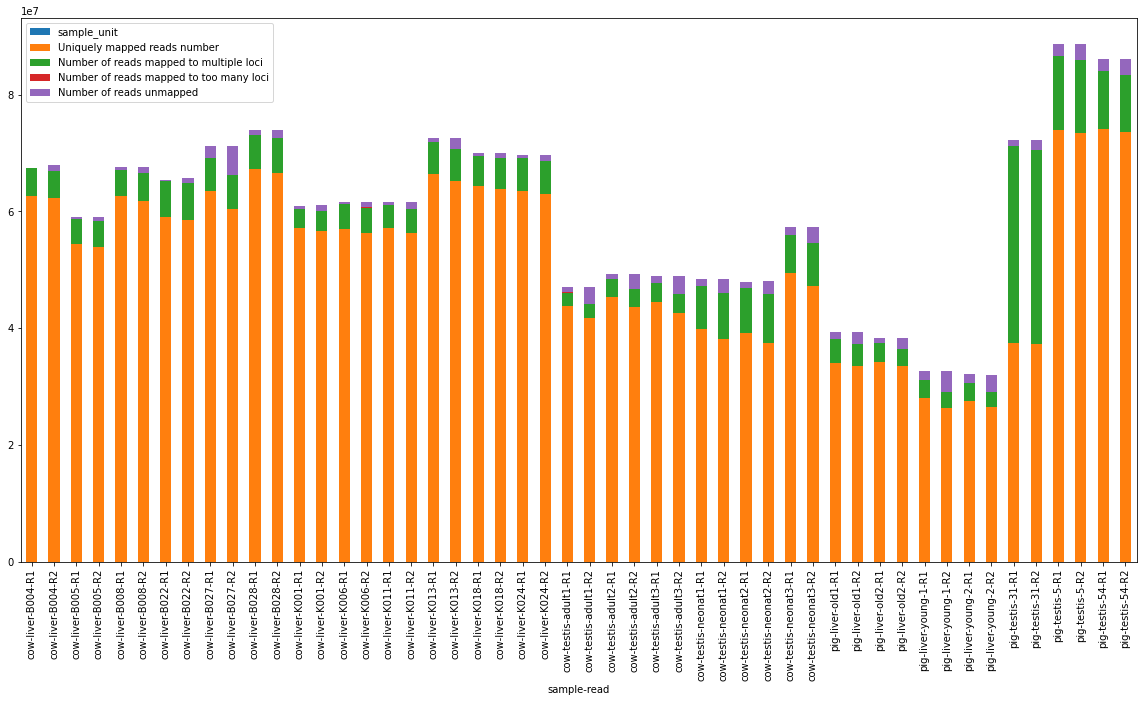

In [41]:
# I. Number of reads per individual:
df1 = pd.DataFrame(df_new, columns=columns)

# Compute the number of unmapped reads:
df1["Number of reads unmapped"] = (df1['Number of input reads'] - (df1['Uniquely mapped reads number'] +  
                                   df1['Number of reads mapped to multiple loci'] + 
                                   df1['Number of chimeric reads']))  

# Create new column with the concatenation of sample and read names:
sample = df1["sample"].to_list() 
read = df1["read"].to_list()
sample_read = [i + "-" + j for i, j in zip(sample, read)] 
df1["sample-read"] = sample_read

# Create a new table with columns of interest:
columns_clean = ['sample', 'sample_unit', 'read', 'sample-read', 'Uniquely mapped reads number', 
                 'Number of reads mapped to multiple loci', 'Number of reads mapped to too many loci',
                 'Number of reads unmapped']
df_clean = pd.DataFrame(df1, columns=columns_clean)
display(df_clean)

# Stacked bar plot:
df_clean.plot.bar(x='sample-read', stacked=True, figsize=(20,10));

,samples,R1,R2
0,cow-liver-K018,499903,402728
1,cow-testis-adult2,430184,347540
2,cow-liver-K001,546774,456801
3,cow-testis-neonat3,395952,368066
4,pig-liver-young-1,374794,392174
5,pig-testis-5,476322,425004
6,cow-liver-B022,209834,234349
7,cow-liver-B008,249161,285375
8,cow-liver-K006,221222,279664
9,cow-testis-neonat2,248792,302274


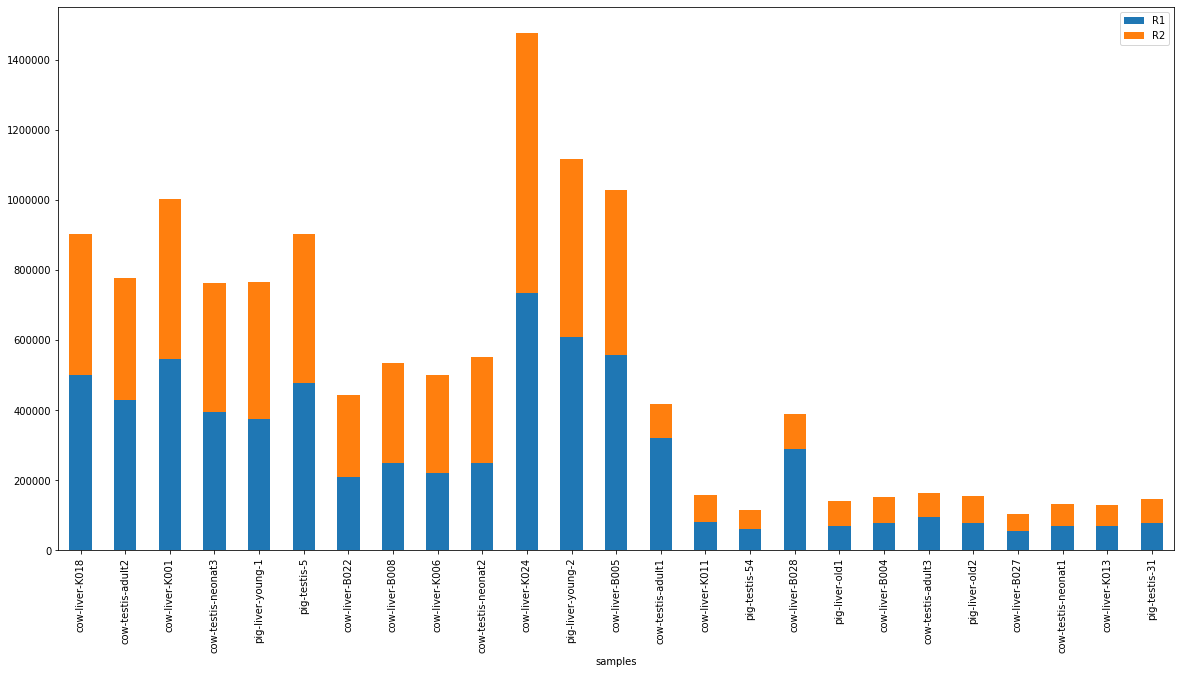

In [86]:
# II. Number of chimeric reads per individual:

# Select the number of chimeric reads for R1 and R2 per individual:
columns_df2 = ['sample', 'sample_unit', 'read', 'sample-read', 'Number of chimeric reads']
df2 = pd.DataFrame(df1, columns=columns_df2)

samples = list(set(df2["sample"].to_list()))
nb_cr_R1 = df2["Number of chimeric reads"][df2["read"]=="R1"].to_list()
nb_cr_R2 = df2["Number of chimeric reads"][df2["read"]=="R2"].to_list()
data = {'samples': samples, 'R1': nb_cr_R1, 'R2': nb_cr_R2}

df3 = pd.DataFrame(data)
display(df3)

# Stacked bar plot:
df3.plot.bar(x='samples', stacked=True, figsize=(20,10));

sample  sample_unit read  \
sample             read                                         
cow-liver-B004     R1        cow-liver-B004          NaN   R1   
                   R2        cow-liver-B004          NaN   R2   
cow-liver-B005     R1        cow-liver-B005          NaN   R1   
                   R2        cow-liver-B005          NaN   R2   
cow-liver-B008     R1        cow-liver-B008          NaN   R1   
                   R2        cow-liver-B008          NaN   R2   
cow-liver-B022     R1        cow-liver-B022          NaN   R1   
                   R2        cow-liver-B022          NaN   R2   
cow-liver-B027     R1        cow-liver-B027          NaN   R1   
                   R2        cow-liver-B027          NaN   R2   
cow-liver-B028     R1        cow-liver-B028          NaN   R1   
                   R2        cow-liver-B028          NaN   R2   
cow-liver-K001     R1        cow-liver-K001          NaN   R1   
                   R2        cow-liver-K001          NaN   R2   
cow-liver-K006     R1        cow-liver-K006          NaN   R1   
                   R2        cow-liver-K006          NaN   R2   
cow-liver-K011     R1        cow-liver-K011          NaN   R1   
                   R2        cow-liver-K011          NaN   R2   
cow-liver-K013     R1        cow-liver-K013          NaN   R1   
                   R2        cow-liver-K013          NaN   R2   
cow-liver-K018     R1        cow-liver-K018          NaN   R1   
                   R2        cow-liver-K018          NaN   R2   
cow-liver-K024     R1        cow-liver-K024          NaN   R1   
                   R2        cow-liver-K024          NaN   R2   
cow-testis-adult1  R1     cow-testis-adult1          NaN   R1   
                   R2     cow-testis-adult1          NaN   R2   
cow-testis-adult2  R1     cow-testis-adult2          NaN   R1   
                   R2     cow-testis-adult2          NaN   R2   
cow-testis-adult3  R1     cow-testis-adult3          NaN   R1   
                   R2     cow-testis-adult3          NaN   R2   
cow-testis-neonat1 R1    cow-testis-neonat1          NaN   R1   
                   R2    cow-testis-neonat1          NaN   R2   
cow-testis-neonat2 R1    cow-testis-neonat2          NaN   R1   
                   R2    cow-testis-neonat2          NaN   R2   
cow-testis-neonat3 R1    cow-testis-neonat3          NaN   R1   
                   R2    cow-testis-neonat3          NaN   R2   
pig-liver-old1     R1        pig-liver-old1          NaN   R1   
                   R2        pig-liver-old1          NaN   R2   
pig-liver-old2     R1        pig-liver-old2          NaN   R1   
                   R2        pig-liver-old2          NaN   R2   
pig-liver-young-1  R1     pig-liver-young-1          NaN   R1   
                   R2     pig-liver-young-1          NaN   R2   
pig-liver-young-2  R1     pig-liver-young-2          NaN   R1   
                   R2     pig-liver-young-2          NaN   R2   
pig-testis-31      R1         pig-testis-31          NaN   R1   
                   R2         pig-testis-31          NaN   R2   
pig-testis-5       R1          pig-testis-5          NaN   R1   
                   R2          pig-testis-5          NaN   R2   
pig-testis-54      R1         pig-testis-54          NaN   R1   
                   R2         pig-testis-54          NaN   R2   

                                   sample-read  \
sample             read                          
cow-liver-B004     R1        cow-liver-B004-R1   
                   R2        cow-liver-B004-R2   
cow-liver-B005     R1        cow-liver-B005-R1   
                   R2        cow-liver-B005-R2   
cow-liver-B008     R1        cow-liver-B008-R1   
                   R2        cow-liver-B008-R2   
cow-liver-B022     R1        cow-liver-B022-R1   
                   R2        cow-liver-B022-R2   
cow-liver-B027     R1        cow-liver-B027-R1   
                   R2        cow-liver-B027-R2   
cow-liver-B028     R1        cow-liver-B028-R1   
      

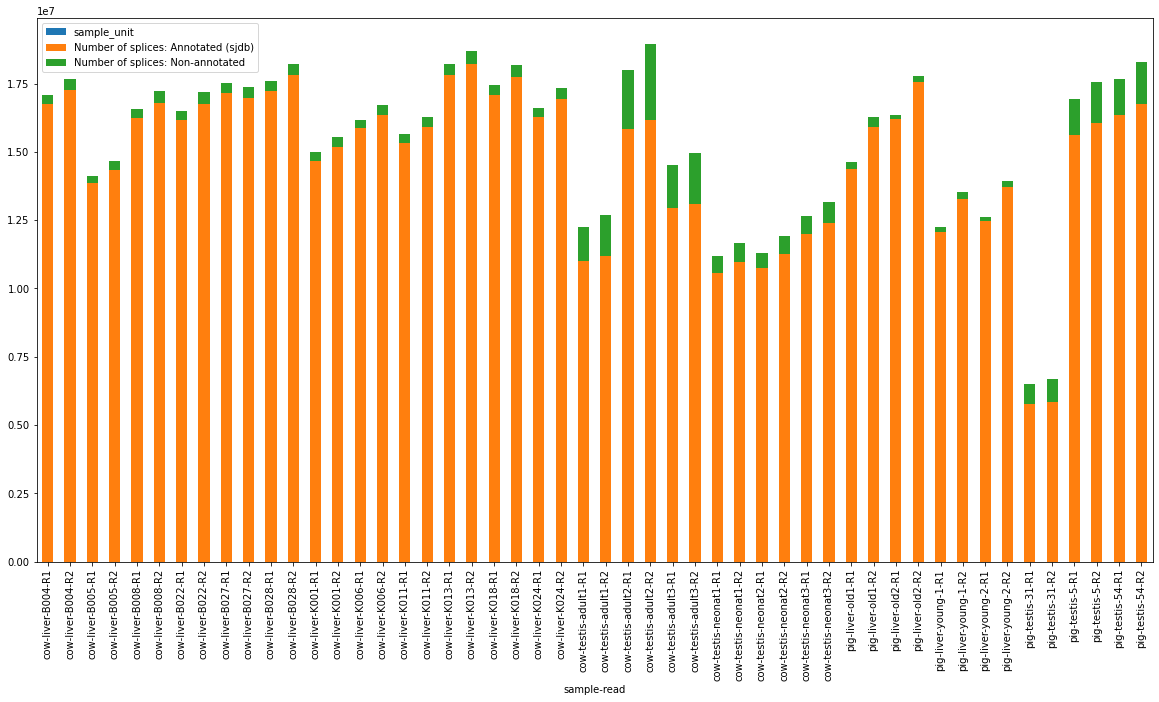

In [42]:
# III. Number of annotated / non-annotated splices (STACKED BAR PLOT):

# Select the the number of annotated and non-annotated splices for R1/R2 per individual:
columns_df3 = ['sample', 'sample_unit', 'read', 'sample-read', 'Number of splices: Total', 
               'Number of splices: Annotated (sjdb)', 'Number of splices: GT/AG', 'Number of splices: GC/AG', 
               'Number of splices: AT/AC', 'Number of splices: Non-canonical']
df3 = pd.DataFrame(df1, columns=columns_df3)

# Compute the number of non-annotated splices:
df3["Number of splices: Non-annotated"] = df3["Number of splices: Total"] - df3["Number of splices: Annotated (sjdb)"]

columns_df4 = ['sample', 'sample_unit', 'read', 'sample-read',  
               'Number of splices: Annotated (sjdb)', 'Number of splices: Non-annotated']
df4 = pd.DataFrame(df3, columns=columns_df4)
display(df4)

# Stacked bar plot:
df4.plot.bar(x='sample-read', stacked=True, figsize=(20,10));

,cow-testis-neonat1-R1,cow-testis-neonat1-R2,cow-testis-neonat2-R1,cow-testis-neonat2-R2,cow-testis-neonat3-R1,cow-testis-neonat3-R2,cow-testis-adult1-R1,cow-testis-adult1-R2,cow-testis-adult2-R1,cow-testis-adult2-R2,...,cow-liver-K006-R1,cow-liver-K006-R2,cow-liver-K011-R1,cow-liver-K011-R2,cow-liver-K013-R1,cow-liver-K013-R2,cow-liver-K018-R1,cow-liver-K018-R2,cow-liver-K024-R1,cow-liver-K024-R2
Annotated,94.511393,94.138087,95.02062,94.558994,94.707799,94.276541,89.826006,87.994871,88.003031,85.366713,...,98.01288,97.670211,97.996605,97.646104,97.893468,97.557646,97.90431,97.568501,97.916991,97.594643
Non-annotated,5.488607,5.861913,4.97938,5.441006,5.292201,5.723459,10.173994,12.005129,11.996969,14.633287,...,1.98712,2.329789,2.003395,2.353896,2.106532,2.442354,2.09569,2.431499,2.083009,2.405357


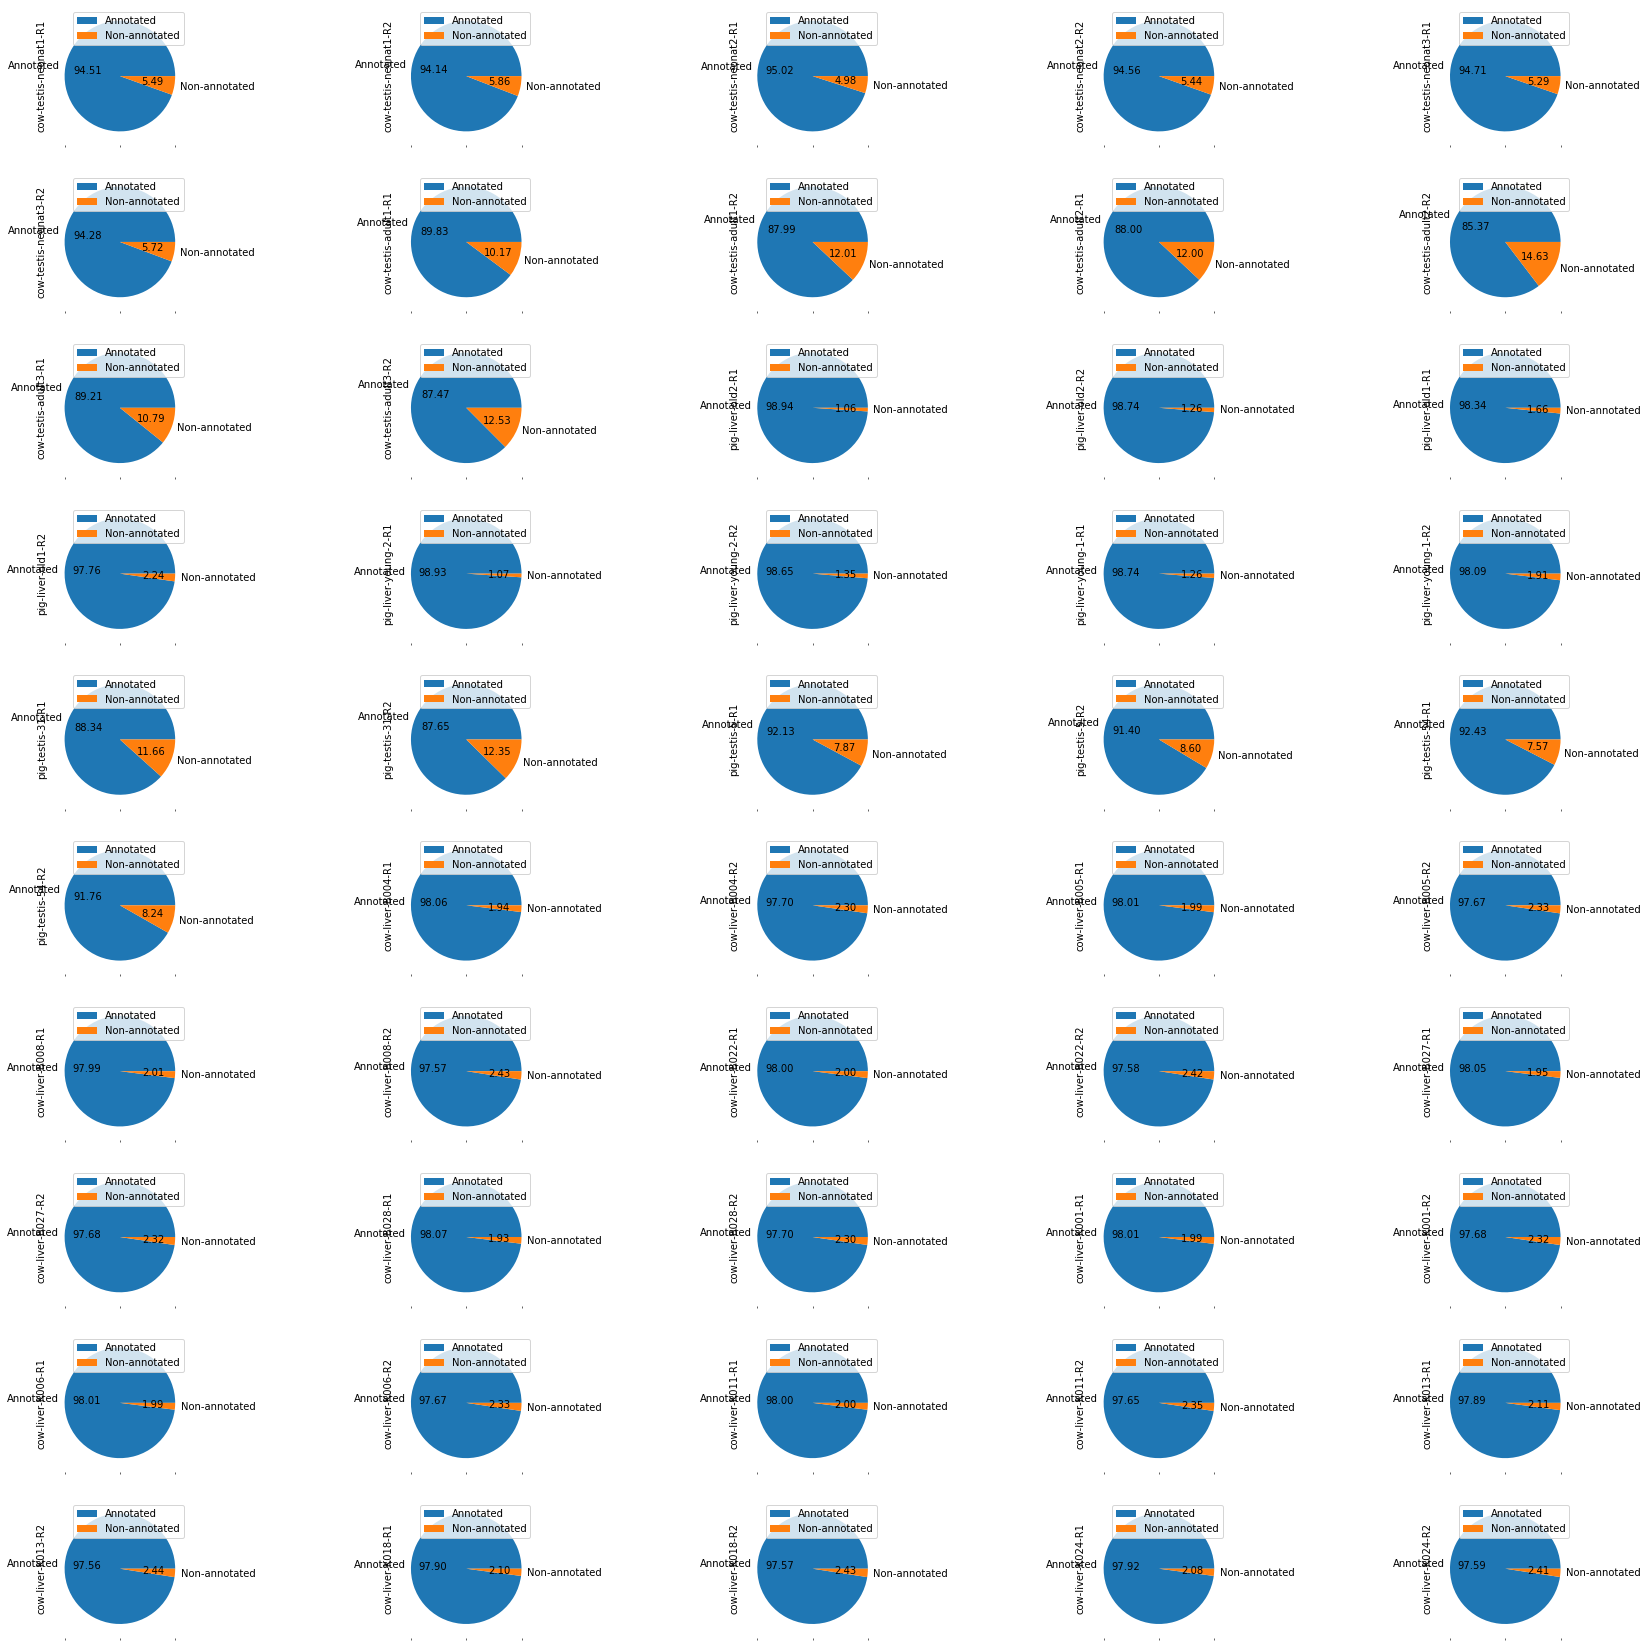

In [165]:
# III. Percentage of annotated / non-annotated splices (PIE):

d = df3.set_index('sample-read')[['% of splices: Annotated (sjdb)','% of splices: Non-annotated']].T.to_dict('list')
df6 = pd.DataFrame(d, index=['Annotated', 'Non-annotated'])
display(df6)

# Pie:   
plot = df6.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(10,5)) 

,sample,sample_unit,read,sample-read,Number of splices: GT/AG,Number of splices: GC/AG,Number of splices: AT/AC,Number of splices: Non-canonical
0,cow-testis-neonat1,SRR7175531,R1,cow-testis-neonat1-R1,11049666,77827,7292,40255
1,cow-testis-neonat1,SRR7175531,R2,cow-testis-neonat1-R2,11528674,90665,6894,30064
2,cow-testis-neonat2,SRR7175526,R1,cow-testis-neonat2-R1,11196248,80588,6439,31888
3,cow-testis-neonat2,SRR7175526,R2,cow-testis-neonat2-R2,11794696,96469,6282,27461
4,cow-testis-neonat3,SRR7175527,R1,cow-testis-neonat3-R1,12495890,91113,8978,51933
5,cow-testis-neonat3,SRR7175527,R2,cow-testis-neonat3-R2,12991432,108028,8319,45245
6,cow-testis-adult1,SRR7175528,R1,cow-testis-adult1-R1,12089627,105441,10690,57794
7,cow-testis-adult1,SRR7175528,R2,cow-testis-adult1-R2,12513759,117686,10017,58168
8,cow-testis-adult2,SRR7175529,R1,cow-testis-adult2-R1,17741381,165901,15176,68745
9,cow-testis-adult2,SRR7175529,R2,cow-testis-adult2-R2,18678235,191597,14023,72282


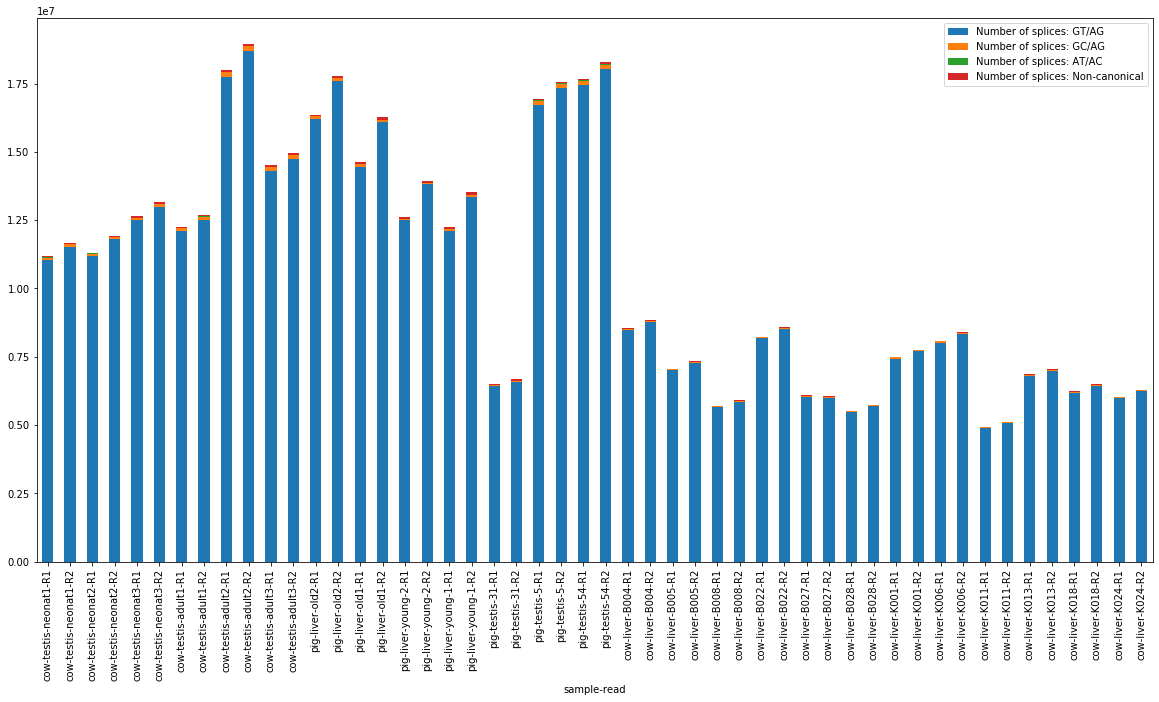

In [95]:
# IV. Number of canonical and non-canonical splices (STACKED BAR PLOT):
columns_df4 = ['sample', 'sample_unit', 'read', 'sample-read',  
               'Number of splices: GT/AG', 'Number of splices: GC/AG', 
               'Number of splices: AT/AC', 'Number of splices: Non-canonical']
df4 = pd.DataFrame(df3, columns=columns_df4)
display(df4)

# Stacked bar plot:
df4.plot.bar(x='sample-read', stacked=True, figsize=(20,10));

,sample,sample_unit,read,sample-read,% of splices: GT/AG,% of splices: GC/AG,% of splices: AT/AC,% of splices: Non-canonical
0,cow-testis-neonat1,SRR7175531,R1,cow-testis-neonat1-R1,98.878089,0.696436,0.065253,0.360222
1,cow-testis-neonat1,SRR7175531,R2,cow-testis-neonat1-R2,98.905115,0.777820,0.059144,0.257921
2,cow-testis-neonat2,SRR7175526,R1,cow-testis-neonat2-R1,98.949065,0.712212,0.056906,0.281817
3,cow-testis-neonat2,SRR7175526,R2,cow-testis-neonat2-R2,98.908067,0.808971,0.052680,0.230283
4,cow-testis-neonat3,SRR7175527,R1,cow-testis-neonat3-R1,98.798031,0.720380,0.070984,0.410605
5,cow-testis-neonat3,SRR7175527,R2,cow-testis-neonat3-R2,98.771446,0.821317,0.063248,0.343989
6,cow-testis-adult1,SRR7175528,R1,cow-testis-adult1-R1,98.581773,0.859792,0.087169,0.471266
7,cow-testis-adult1,SRR7175528,R2,cow-testis-adult1-R2,98.536406,0.926688,0.078876,0.458029
8,cow-testis-adult2,SRR7175529,R1,cow-testis-adult2-R1,98.611421,0.922123,0.084352,0.382103
9,cow-testis-adult2,SRR7175529,R2,cow-testis-adult2-R2,98.533973,1.010739,0.073976,0.381312


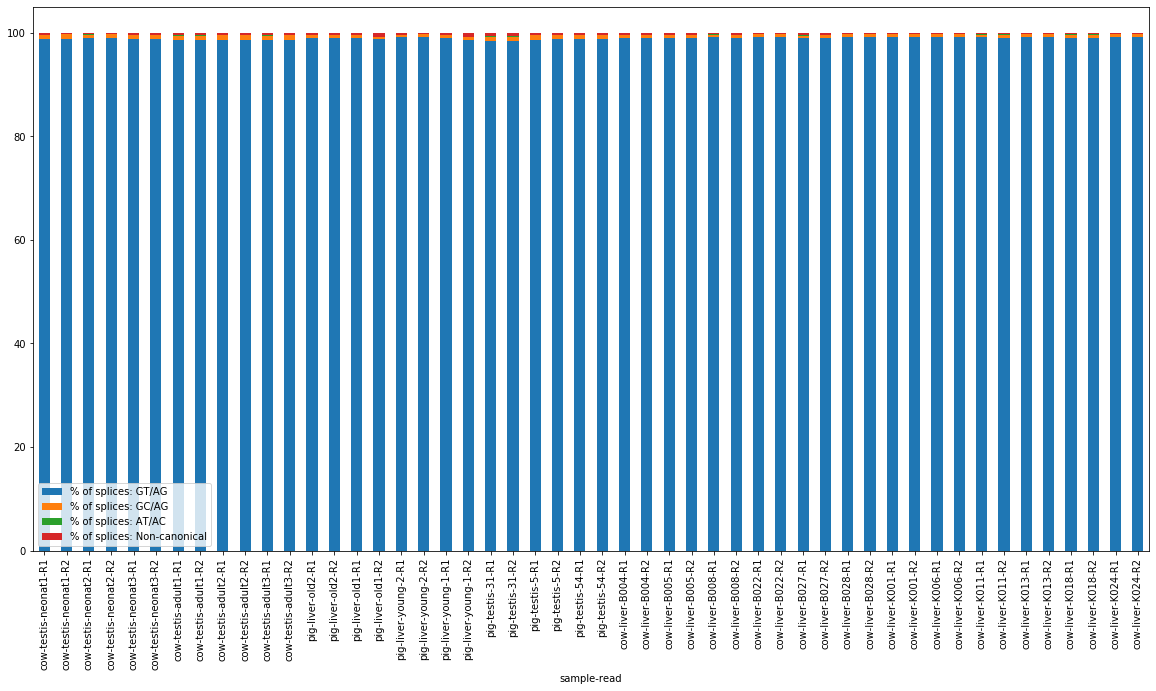

In [97]:
# IV. Percentage of canonical and non-canonical splices (STACKED BAR PLOT):

# Compute the percentage of canonocal and non-canonical splices for R1 and R2 per individual:
df3["% of splices: GT/AG"] = ((df3["Number of splices: GT/AG"] * 100) / df3["Number of splices: Total"])
df3["% of splices: GC/AG"] = ((df3["Number of splices: GC/AG"] * 100) / df3["Number of splices: Total"])
df3["% of splices: AT/AC"] = ((df3["Number of splices: AT/AC"] * 100) / df3["Number of splices: Total"])
df3["% of splices: Non-canonical"] = ((df3["Number of splices: Non-canonical"] * 100) / df3["Number of splices: Total"])
df3["% of splices: Annotated (sjdb)"] = ((df3["Number of splices: Annotated (sjdb)"] * 100) / df3["Number of splices: Total"])
df3["% of splices: Non-annotated"] = ((df3["Number of splices: Non-annotated"] * 100) / df3["Number of splices: Total"])

columns_df5 = ['sample', 'sample_unit', 'read', 'sample-read', '% of splices: GT/AG', 
               '% of splices: GC/AG', '% of splices: AT/AC', '% of splices: Non-canonical']
df5 = pd.DataFrame(df3, columns=columns_df5)
display(df5)

# Stacked bar plot:
df5.plot.bar(x='sample-read', stacked=True, figsize=(20,10))

,cow-testis-neonat1-R1,cow-testis-neonat1-R2,cow-testis-neonat2-R1,cow-testis-neonat2-R2,cow-testis-neonat3-R1,cow-testis-neonat3-R2,cow-testis-adult1-R1,cow-testis-adult1-R2,cow-testis-adult2-R1,cow-testis-adult2-R2,...,cow-liver-K006-R1,cow-liver-K006-R2,cow-liver-K011-R1,cow-liver-K011-R2,cow-liver-K013-R1,cow-liver-K013-R2,cow-liver-K018-R1,cow-liver-K018-R2,cow-liver-K024-R1,cow-liver-K024-R2
GT/AG,98.878089,98.905115,98.949065,98.908067,98.798031,98.771446,98.581773,98.536406,98.611421,98.533973,...,99.141276,99.135252,99.110377,99.086337,99.174010,99.167188,99.054932,99.058569,99.158822,99.144984
GC/AG,0.696436,0.777820,0.712212,0.808971,0.720380,0.821317,0.859792,0.926688,0.922123,1.010739,...,0.581077,0.597874,0.550847,0.584031,0.564067,0.582402,0.598374,0.612070,0.565135,0.590703
AT/AC,0.065253,0.059144,0.056906,0.052680,0.070984,0.063248,0.087169,0.078876,0.084352,0.073976,...,0.026809,0.026013,0.027092,0.025768,0.026751,0.027643,0.030954,0.030922,0.029378,0.028686
Non-canonical,0.360222,0.257921,0.281817,0.230283,0.410605,0.343989,0.471266,0.458029,0.382103,0.381312,...,0.250838,0.240861,0.311684,0.303863,0.235171,0.222767,0.315740,0.298439,0.246665,0.235626


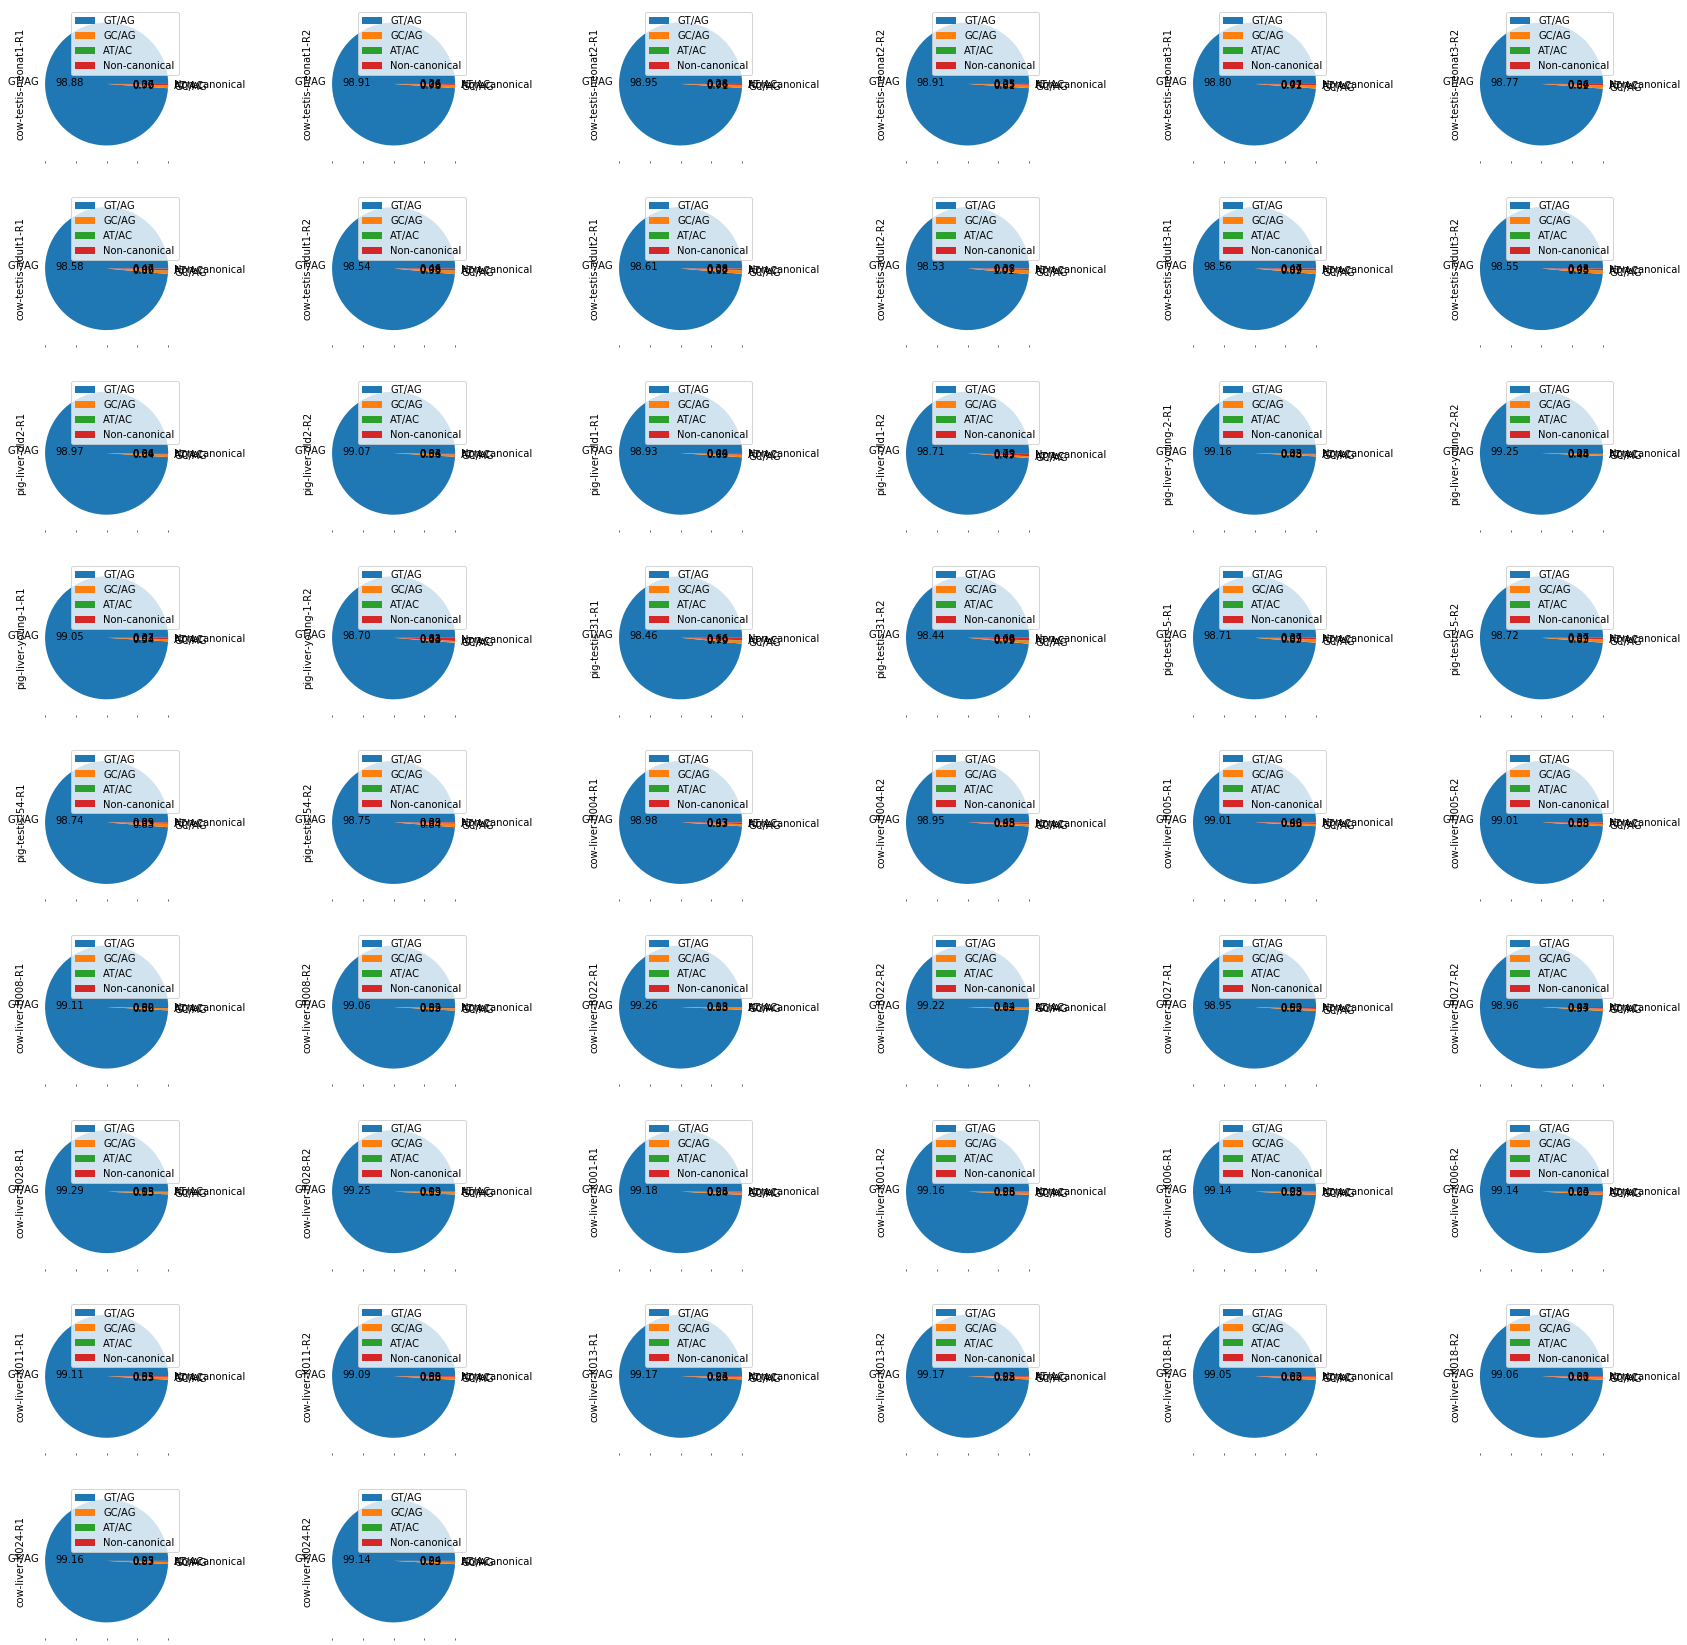

In [169]:
# IV. Percentage of canonical and non-canonical splices (PIE):

p_splice_GT_AG = df3["% of splices: GT/AG"].to_list() 
p_splice_GC_AG = df3["% of splices: GC/AG"].to_list()
p_splice_AT_AC = df3["% of splices: AT/AC"].to_list()
p_non_canonical = df3["% of splices: Non-canonical"].to_list()
index = df3["sample"]

d = df3.set_index('sample-read')[['% of splices: GT/AG','% of splices: GC/AG',
                             '% of splices: AT/AC', '% of splices: Non-canonical']].T.to_dict('list')
df6 = pd.DataFrame(d, index=['GT/AG', 'GC/AG', 'AT/AC', 'Non-canonical'])
display(df6)

# Pie:   
plot = df6.plot.pie(subplots=True, autopct='%.2f', figsize=(30, 30), layout=(9,6)) 

,samples,R1,R2
0,cow-liver-K018,148.39,147.66
1,cow-testis-adult2,148.55,147.83
2,cow-liver-K001,148.53,147.76
3,cow-testis-neonat3,148.39,147.37
4,pig-liver-young-1,148.48,147.60
5,pig-testis-5,148.15,147.14
6,cow-liver-B022,148.13,147.64
7,cow-liver-B008,147.89,147.53
8,cow-liver-K006,147.79,146.90
9,cow-testis-neonat2,147.50,146.59


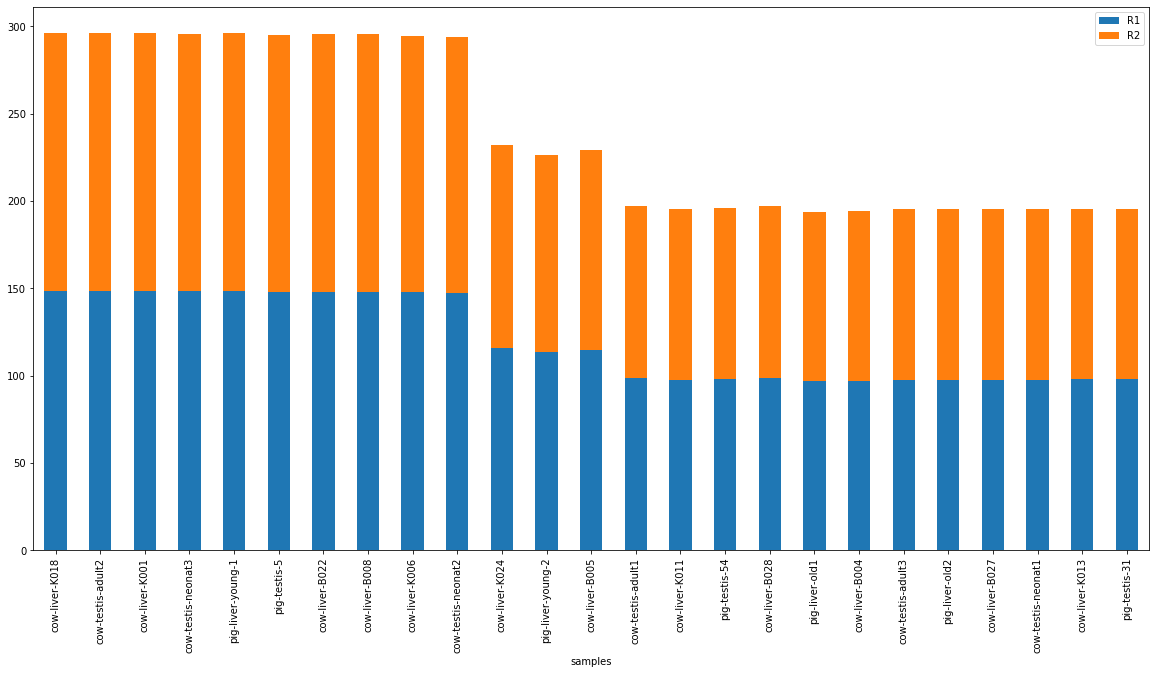

In [99]:
# V. Read size per individual:

columns_df7 = ['sample', 'sample_unit', 'read', 'sample-read', 'Average mapped length']
df7 = pd.DataFrame(df1, columns=columns_df7)

samples = list(set(df2["sample"].to_list()))
read_size_R1 = df1["Average mapped length"][df1["read"]=="R1"].to_list()
read_size_R2 = df1["Average mapped length"][df1["read"]=="R2"].to_list()
data = {'samples': samples, 'R1': read_size_R1, 'R2': read_size_R2}
df8 = pd.DataFrame(data)
display(df8)

# Stacked bar plot:
df8.plot.bar(x='samples', stacked=True, figsize=(20,10));